In [ ]:
import os

def select_db_file():
    # Ask user to select folder
    folder_path = "D:\\Databases\\"
    
    # List all files in folder with .db extension
    db_files = [f for f in os.listdir(folder_path) if f.endswith('.db')]

    # Print the list of files
    print("Select a file by entering its index:")
    for i, f in enumerate(db_files):
        print(f"{i}: {f}")

    # Ask user to select file by index
    index = int(input("Enter index of file to select: "))

    # Return the selected file name
    return folder_path + db_files[index]
selected_db = select_db_file()
selected_db

In [3]:
## First let's import the packages we will use in this project
# You can do this all now or as you need them
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
import re
plt.style.use('ggplot')
from matplotlib.pyplot import figure
from scipy.stats import chi2_contingency
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)
import sqlite3 as sl
pd.options.mode.chained_assignment = None

con = sl.connect(selected_db)
# # query only from Patients, Currently have to enter the patients encrypted id.
df = pd.read_sql("SELECT ID,VisualTargetXCoord,TimeStampMS, VisualTargetYCoord,TargetXCoord,TargetYCoord, GameID,TimeStampDate,KxGain,KyGain from TargetFeedbackDataModel where PatientID=='TTSH-CHISELCn5PqGNyMkKoyFYaOryw5g==' AND GameId==0",con)


In [4]:
#Hard-coding the patients name, as in the next version the csv file will have encrypted usernames
user_id_dict = {
    'Patient1':'001', 
    'Patient2':'002',
    'Patient3':'003', 
    'Patient4':'004',
    'Patient5':'005',
    'Patient6':'006',
   
}; 

In [5]:
import os

def select_csv_file():
    # Ask user to select folder
    folder_path = "D:\\Patients Gameplay Data\\"

    # List all files in folder with .db extension
    db_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

    # Print the list of files
    print("Select a file by entering its index:")
    for i, f in enumerate(db_files):
        print(f"{i}: {f}")

    # Ask user to select file by index
    index = int(input("Enter index of file to select: "))

    # Return the selected file name
    return folder_path + db_files[index]
selected_csv = select_csv_file()
selected_csv

Select a file by entering its index:
0: gameplay_007_new.csv
1: gameplay_008_new.csv
2: gameplay_009_new.csv
3: gameplay_010_new.csv
4: gameplay_011_new.csv
5: gameplay_012_new.csv
6: gameplay_stiffness_new.csv
7: gameplay_validate_new.csv
8: gameplay_validate_tab.csv
9: table001.csv
10: table002.csv
11: table003.csv
12: table004.csv
13: table005.csv
14: table006.csv
Enter index of file to select: 14


'D:\\Articares\\Patients Gameplay Data\\table006.csv'

In [6]:
#Get the gameplay data from csv files generated from previous code "Patients_Sessions_info"
# Now we need to read in the data
df_gp_all = pd.read_csv(selected_csv)
df_gp_all

,gameplay_model_0061,gameplay_model_0062,gameplay_model_0063,gameplay_model_0064,gameplay_model_0065,gameplay_model_0066
0,2022-05-13 12:51:26,2022-05-13 12:51:32,2,TTSH-CHISELCn5PqGNyMkKoyFYaOryw5g==,TTSH-CHISELCJytTGjHB0mo9zS9wUD+mA==,Flying Drone
1,2022-05-13 12:54:12,2022-05-13 12:54:21,1,TTSH-CHISELCn5PqGNyMkKoyFYaOryw5g==,TTSH-CHISEL49l6A4YNIUKlgrfpd81V6Q==,Catch the Fish
2,2022-05-13 18:07:33,2022-05-13 18:23:12,2,TTSH-CHISELCn5PqGNyMkKoyFYaOryw5g==,TTSH-CHISELugL3DxELE0eZjcBnurRzwA==,Flying Drone
3,2022-05-14 18:09:40,2022-05-14 18:19:51,0,TTSH-CHISELCn5PqGNyMkKoyFYaOryw5g==,TTSH-CHISELy0I7yzluAE23FF63m+IH6A==,Explore the World
4,2022-05-14 18:20:14,2022-05-14 18:30:20,1,TTSH-CHISELCn5PqGNyMkKoyFYaOryw5g==,TTSH-CHISELy0I7yzluAE23FF63m+IH6A==,Catch the Fish
...,...,...,...,...,...,...
104,2022-05-30 12:52:18,2022-05-30 13:04:24,1,TTSH-CHISELCn5PqGNyMkKoyFYaOryw5g==,TTSH-CHISELMFkD1wGFqkmDE64ZW8So2g==,Catch the Fish
105,2022-05-31 11:00:37,2022-05-31 11:13:29,0,TTSH-CHISELCn5PqGNyMkKoyFYaOryw5g==,TTSH-CHISELPrKt//O8H0KcJZ3mdBnR4Q==,Explore the World
106,2022-05-31 11:13:45,2022-05-31 11:34:11,1,TTSH-CHISELCn5PqGNyMkKoyFYaOryw5g==,TTSH-CHISELPrKt//O8H0KcJZ3mdBnR4Q==,Catch the Fish
107,2022-05-31 11:34:37,2022-05-31 11:38:21,2,TTSH-CHISELCn5PqGNyMkKoyFYaOryw5g==,TTSH-CHISELPrKt//O8H0KcJZ3mdBnR4Q==,Flying Drone


In [7]:
df_gp_all.columns = [ 'StartTimeStampDate', 'EndTimeStampDate', 'GameID','PatID','Sessionid','GameID_names'] # rename columns


df_gp_all

,StartTimeStampDate,EndTimeStampDate,GameID,PatID,Sessionid,GameID_names
0,2022-05-13 12:51:26,2022-05-13 12:51:32,2,TTSH-CHISELCn5PqGNyMkKoyFYaOryw5g==,TTSH-CHISELCJytTGjHB0mo9zS9wUD+mA==,Flying Drone
1,2022-05-13 12:54:12,2022-05-13 12:54:21,1,TTSH-CHISELCn5PqGNyMkKoyFYaOryw5g==,TTSH-CHISEL49l6A4YNIUKlgrfpd81V6Q==,Catch the Fish
2,2022-05-13 18:07:33,2022-05-13 18:23:12,2,TTSH-CHISELCn5PqGNyMkKoyFYaOryw5g==,TTSH-CHISELugL3DxELE0eZjcBnurRzwA==,Flying Drone
3,2022-05-14 18:09:40,2022-05-14 18:19:51,0,TTSH-CHISELCn5PqGNyMkKoyFYaOryw5g==,TTSH-CHISELy0I7yzluAE23FF63m+IH6A==,Explore the World
4,2022-05-14 18:20:14,2022-05-14 18:30:20,1,TTSH-CHISELCn5PqGNyMkKoyFYaOryw5g==,TTSH-CHISELy0I7yzluAE23FF63m+IH6A==,Catch the Fish
...,...,...,...,...,...,...
104,2022-05-30 12:52:18,2022-05-30 13:04:24,1,TTSH-CHISELCn5PqGNyMkKoyFYaOryw5g==,TTSH-CHISELMFkD1wGFqkmDE64ZW8So2g==,Catch the Fish
105,2022-05-31 11:00:37,2022-05-31 11:13:29,0,TTSH-CHISELCn5PqGNyMkKoyFYaOryw5g==,TTSH-CHISELPrKt//O8H0KcJZ3mdBnR4Q==,Explore the World
106,2022-05-31 11:13:45,2022-05-31 11:34:11,1,TTSH-CHISELCn5PqGNyMkKoyFYaOryw5g==,TTSH-CHISELPrKt//O8H0KcJZ3mdBnR4Q==,Catch the Fish
107,2022-05-31 11:34:37,2022-05-31 11:38:21,2,TTSH-CHISELCn5PqGNyMkKoyFYaOryw5g==,TTSH-CHISELPrKt//O8H0KcJZ3mdBnR4Q==,Flying Drone


In [8]:

#As we are working on the stiffness value for explore, so have to get only gameid
df_gp_explore=df_gp_all[df_gp_all['GameID']==0]
df_gp_explore=df_gp_explore.reset_index(drop=True)
df_gp_explore.head()

,StartTimeStampDate,EndTimeStampDate,GameID,PatID,Sessionid,GameID_names
0,2022-05-14 18:09:40,2022-05-14 18:19:51,0,TTSH-CHISELCn5PqGNyMkKoyFYaOryw5g==,TTSH-CHISELy0I7yzluAE23FF63m+IH6A==,Explore the World
1,2022-05-14 19:05:26,2022-05-14 19:16:53,0,TTSH-CHISELCn5PqGNyMkKoyFYaOryw5g==,TTSH-CHISELFZdp5pooS02/Lf7vPNdjqQ==,Explore the World
2,2022-05-15 07:48:15,2022-05-15 07:49:13,0,TTSH-CHISELCn5PqGNyMkKoyFYaOryw5g==,TTSH-CHISELqaY0g1flJEeOqfrdXVGQ/Q==,Explore the World
3,2022-05-15 07:50:56,2022-05-15 08:10:12,0,TTSH-CHISELCn5PqGNyMkKoyFYaOryw5g==,TTSH-CHISELqaY0g1flJEeOqfrdXVGQ/Q==,Explore the World
4,2022-05-15 16:47:31,2022-05-15 16:58:01,0,TTSH-CHISELCn5PqGNyMkKoyFYaOryw5g==,TTSH-CHISELr/6lkn0sZEWvWPASnpFNbw==,Explore the World


In [9]:
#Change the types to numeric
df['KxGain'] = pd.to_numeric(df['KxGain'])
df.reset_index(inplace=True)
df.rename(columns={'index': 'RealID'}, inplace=True)
df
df.head()

,RealID,ID,VisualTargetXCoord,TimeStampMS,VisualTargetYCoord,TargetXCoord,TargetYCoord,GameID,TimeStampDate,KxGain,KyGain
0,0,84342,171.0,97835,22.0,233.0,158.0,0,2022-05-14 18:09:40,200.0,200.0
1,1,84343,171.0,97845,22.0,233.0,158.0,0,2022-05-14 18:09:40,200.0,200.0
2,2,84344,171.0,97855,22.0,233.0,158.0,0,2022-05-14 18:09:40,200.0,200.0
3,3,84345,171.0,97865,22.0,233.0,158.0,0,2022-05-14 18:09:40,200.0,200.0
4,4,84346,171.0,97875,22.0,233.0,158.0,0,2022-05-14 18:09:40,200.0,200.0


In [18]:
import pandas as pd
import numpy as np
import math

# df_db_game0 = pd.read_sql("SELECT ID, VisualTargetXCoord, VisualTargetYCoord, TimeStampDate, GameID FROM TargetFeedBackDataModel where PatientID=='ArticaresMarchsJLhShof20CDIKQfRAHC7Q==' and GameId==0", con)
df_0_explore = df_gp_explore[df_gp_explore['GameID_names'] == 'Explore the World']

for index, row in df_0_explore.iterrows():
    start_date = row['StartTimeStampDate']
    end_date = row['EndTimeStampDate']

    condition = (df['TimeStampDate'] >= start_date) & (df['TimeStampDate'] <= end_date)
    result_0 = df[condition]
    chunk_repeat = result_0[(result_0['VisualTargetXCoord'].diff() != 0) | (result_0['VisualTargetYCoord'].diff() != 0)]
    # Calculate count when x or y changes
    #count = result_0[(result_0['VisualTargetXCoord'].diff() != 0) | (result_0['VisualTargetYCoord'].diff() != 0)].shape[0]
    chunk_repeat['type_check'] = np.nan
    chunk_repeat = chunk_repeat.reset_index(drop=True)

    # Calculate the number of chunks and the bin size
    num_rows = len(chunk_repeat)
    bin_size = 8
    num_chunks = math.ceil(num_rows / bin_size)

    # Iterate over each chunk
    for i in range(num_chunks):
        # Calculate the start and end indices of the current chunk
        start_index = i * bin_size
        end_index = min((i + 1) * bin_size, num_rows)

        # Assign type_check values to the current chunk
        for j in range(start_index, end_index - 1):
            if chunk_repeat['VisualTargetXCoord'].iloc[j+1] == chunk_repeat['TargetXCoord'].iloc[j] and chunk_repeat['VisualTargetYCoord'].iloc[j+1] == chunk_repeat['TargetYCoord'].iloc[j]:
                chunk_repeat['type_check'].iloc[j] = 0
            elif chunk_repeat['VisualTargetXCoord'].iloc[j] == chunk_repeat['TargetXCoord'].iloc[j] and chunk_repeat['VisualTargetYCoord'].iloc[j] == chunk_repeat['TargetYCoord'].iloc[j]:
                chunk_repeat['type_check'].iloc[j] = 1
            elif chunk_repeat['VisualTargetXCoord'].iloc[j] != chunk_repeat['TargetXCoord'].iloc[j] and chunk_repeat['VisualTargetYCoord'].iloc[j] != chunk_repeat['TargetYCoord'].iloc[j]:
                chunk_repeat['type_check'].iloc[j] = 2

        # Assign the last type_check value of the chunk to the last row of result_0
        last_index = min(end_index - 1, num_rows - 1)
        last_type_check = chunk_repeat['type_check'].iloc[min(end_index - 2, num_rows - 1)]
        chunk_repeat['type_check'].iloc[last_index] = last_type_check

    # Forward fill NaN values in the type_check column of result_0
    chunk_repeat['type_check'].fillna(method='ffill', inplace=True)

    # Update the type_check values in the matching rows of the original DataFrame
    for i, row in chunk_repeat.iterrows():
        matches = df[
            (df['VisualTargetXCoord'] == row['VisualTargetXCoord']) &
            (df['VisualTargetYCoord'] == row['VisualTargetYCoord']) &
            (df['TargetXCoord'] == row['TargetXCoord']) &
            (df['TargetYCoord'] == row['TargetYCoord'])
        ]

        if not matches.empty:
            df.loc[matches.index, 'type_check'] = row['type_check']
    



In [19]:
df.head()

,RealID,ID,VisualTargetXCoord,TimeStampMS,VisualTargetYCoord,TargetXCoord,TargetYCoord,GameID,TimeStampDate,KxGain,KyGain,type_check
0,0,84342,171.0,97835,22.0,233.0,158.0,0,2022-05-14 18:09:40,200.0,200.0,0.0
1,1,84343,171.0,97845,22.0,233.0,158.0,0,2022-05-14 18:09:40,200.0,200.0,0.0
2,2,84344,171.0,97855,22.0,233.0,158.0,0,2022-05-14 18:09:40,200.0,200.0,0.0
3,3,84345,171.0,97865,22.0,233.0,158.0,0,2022-05-14 18:09:40,200.0,200.0,0.0
4,4,84346,171.0,97875,22.0,233.0,158.0,0,2022-05-14 18:09:40,200.0,200.0,0.0


In [20]:
#Chnage the types to numeric

df['type_check'] = pd.to_numeric(df['type_check'])
# Change the sign of KxGain where GameLevelC is 2
df.loc[df['type_check'] == 2, 'KxGain'] = -df.loc[df['type_check'] == 2, 'KxGain']
#df.reset_index(inplace=True)
#df.rename(columns={'index': 'RealID'}, inplace=True)
df
df.head()

,RealID,ID,VisualTargetXCoord,TimeStampMS,VisualTargetYCoord,TargetXCoord,TargetYCoord,GameID,TimeStampDate,KxGain,KyGain,type_check
0,0,84342,171.0,97835,22.0,233.0,158.0,0,2022-05-14 18:09:40,200.0,200.0,0.0
1,1,84343,171.0,97845,22.0,233.0,158.0,0,2022-05-14 18:09:40,200.0,200.0,0.0
2,2,84344,171.0,97855,22.0,233.0,158.0,0,2022-05-14 18:09:40,200.0,200.0,0.0
3,3,84345,171.0,97865,22.0,233.0,158.0,0,2022-05-14 18:09:40,200.0,200.0,0.0
4,4,84346,171.0,97875,22.0,233.0,158.0,0,2022-05-14 18:09:40,200.0,200.0,0.0


In [21]:
#df.to_csv('check_stiffness_mm.csv')

In [22]:
#df_db_game0 = pd.read_sql("SELECT ID,VisualTargetXCoord, VisualTargetYCoord, TimeStampDate,GameID FROM TargetFeedBackDataModel where PatientID=='ArticaresMarchsJLhShof20CDIKQfRAHC7Q==' and GameId==0",con)
df_0_explore=df_gp_explore[df_gp_explore['GameID_names']=='Explore the World']
#Explore
gp_c=[]
k_x_mean=[]
count_explore=0
for index, row in df_0_explore.iterrows():
    start_date = row['StartTimeStampDate']
    end_date = row['EndTimeStampDate']
    condition = (df['TimeStampDate'] >= start_date) & (df['TimeStampDate'] <= end_date)
    result_0 = df[condition]
    # Calculate count when x or y changes
    count = result_0[(result_0['VisualTargetXCoord'].diff() != 0) | (result_0['VisualTargetYCoord'].diff() != 0)].shape[0]
    chunk_repeat=(result_0[(result_0['VisualTargetXCoord'].diff() != 0) | (result_0['VisualTargetYCoord'].diff() != 0)])

    mean_list=[];
    for i, id in enumerate(chunk_repeat['RealID']):
        #print(id)
        if i < len(chunk_repeat['RealID'])-1:
            start_index=id
            end_index=chunk_repeat['RealID'].iloc[i+1]-1
            #print(start_index)
            #print(end_index)
            # calculate the mean for the current group
            mean = df.loc[start_index:end_index, 'KxGain'].mean()
            # add the mean to the list
            mean_list.append(mean)
        elif i == (len(chunk_repeat['RealID'])-1):
            start_index=id
            end_index=result_0['RealID'].iloc[-1]
            #print(start_index)
            #print(end_index)
            # calculate the mean for the current group
            mean = df.loc[start_index:end_index, 'KxGain'].mean()
            # add the mean to the list
            mean_list.append(mean)
    k_x_mean.append(mean_list)    
    count_explore=count_explore+count
count_explore


6305

In [23]:
chunk_repeat.head()

,RealID,ID,VisualTargetXCoord,TimeStampMS,VisualTargetYCoord,TargetXCoord,TargetYCoord,GameID,TimeStampDate,KxGain,KyGain,type_check
1881161,1881161,5289561,171.0,37847,22.0,55.0,117.0,0,2022-05-31 11:00:37,200.0,200.0,0.0
1881386,1881386,5289786,55.0,40182,117.0,203.0,138.0,0,2022-05-31 11:00:40,200.0,200.0,0.0
1881618,1881618,5290018,203.0,42582,138.0,92.0,239.0,0,2022-05-31 11:00:42,200.0,200.0,0.0
1881943,1881943,5290343,92.0,46422,239.0,240.0,263.0,0,2022-05-31 11:00:46,200.0,200.0,0.0
1882157,1882157,5290557,240.0,49042,263.0,287.0,121.0,0,2022-05-31 11:00:48,200.0,200.0,0.0


In [24]:
df = df.drop(df.index[-1])

In [25]:
len(k_x_mean)

37

In [29]:
k_x_mean[1]

[200.0,
 236.89607398650224,
 200.0,
 200.0,
 200.0,
 243.5427703857422,
 285.27923583984375,
 258.4873352050781,
 234.1566619873047,
 212.5463409423828,
 183.2135467529297,
 156.4911651611328,
 131.33279418945312,
 112.64579010009766,
 95.38191223144531,
 80.92369842529297,
 71.54235076904297,
 67.0942153930664,
 60.623878479003906,
 55.00001907348633,
 55.09193801879883,
 51.05254364013672,
 40.05331802368164,
 29.08271026611328,
 18.06047821044922,
 4.153413772583008,
 -4.973506927490234,
 -11.456673622131348,
 -19.90824317932129,
 -30.433996200561523,
 -44.36967086791992,
 -63.02271270751953,
 -79.6203842163086,
 -90.53369903564453,
 -68.76652526855469,
 -39.31053924560547,
 -4.505308628082275,
 30.981761932373047,
 61.206298828125,
 60.46989822387695,
 52.53852844238281,
 46.4637565612793,
 38.827945709228516,
 34.098167419433594,
 30.213607788085938,
 28.9167537689209,
 21.806676864624023,
 18.021595001220703,
 10.705402374267578,
 6.750519275665283,
 1.0447410345077515,
 -1.3277

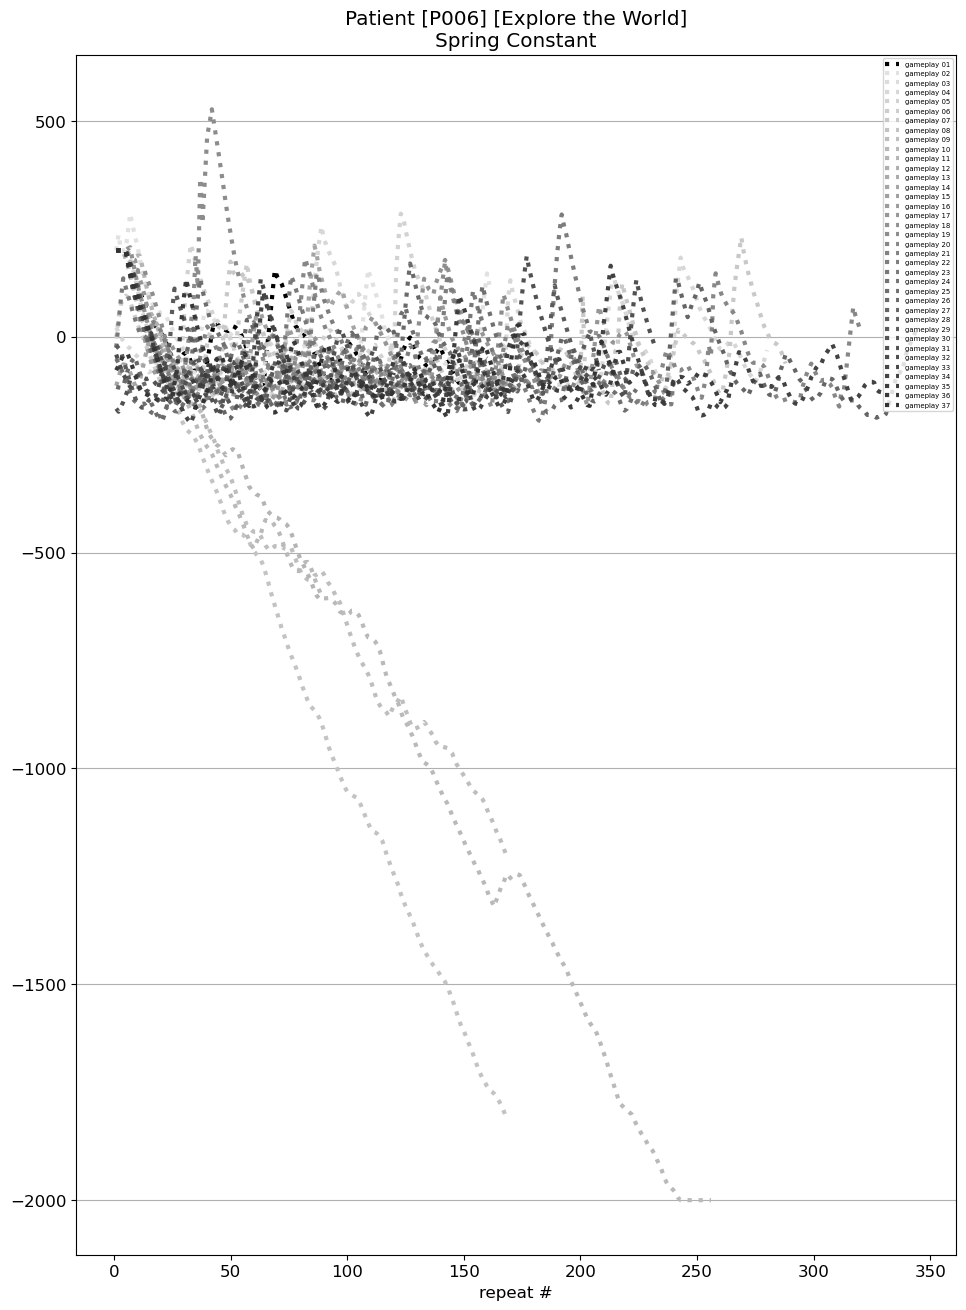

In [30]:
import numpy as np
import matplotlib.pyplot as plt

# set the figure properties
plt.style.use('default')
plt.figure(figsize=(10,15))
plt.rcParams.update({'font.size': 12})
plt.subplots_adjust(left=0.07, bottom=0.1, right=0.95, top=0.9)
pat_idstr='P006'
game_id_str='Explore the World'
title_str = f'Patient [{pat_idstr}] [{game_id_str}]'

wid_max = 8
wid_min = 1
D_wid   = wid_max - wid_min  

col_max = 0.9
col_min = 0.2
D_col   = col_max - col_min

sty_arr = [':']*20 + [':']*20 + ['-']*20 + ['-.']*20 + ['--']*20 + ['-']*20 + ['-']*20 + ['-']*20 + ['-']*20

# create the plot
gp_count_range = np.arange(len(k_x_mean))
len_gp    = len(gp_count_range)

if len_gp > 1:
    frac_up   = np.arange(len_gp) / (len_gp - 1)
    frac_down = np.flip(frac_up) 
else:
    frac_up   = np.array([0])
    frac_down = np.array([0])
    
pl_h = []
for gp_count in gp_count_range:
    len_rep = len(k_x_mean[gp_count])                    
                    
    wid = 3
    
    col = (col_max - D_col*frac_up[gp_count])*np.array([1, 1, 1]) if gp_count > 0 else 'k'
    
    pl_h.append(plt.plot(np.arange(1,len_rep+1), k_x_mean[gp_count], 
                         linewidth=wid, color=col, linestyle=sty_arr[gp_count])[0])
    
    leg_str = [f'gameplay {i+1:02d}' for i in gp_count_range]
                                
plt.grid(True, axis='y')
plt.xlabel('repeat #')
#plt.ylabel('Stiffness coefficient')
plt.legend(pl_h, leg_str, fontsize=5, loc='upper right')
plt.title(f"{title_str}\nSpring Constant")
plt.savefig('D:\Articares\Patients Gameplay Data\P006_stiffness_evolve.png')
plt.show()


In [31]:
last_five_means = [np.mean(sublist[-5:]) for sublist in k_x_mean]

In [32]:
last_five_means[1:5]

[86.81267404556274, 60.82441711425781, -64.55173759460449, -94.4620964050293]

In [33]:
last_five_means = [0 if np.isnan(x) else x for x in last_five_means]

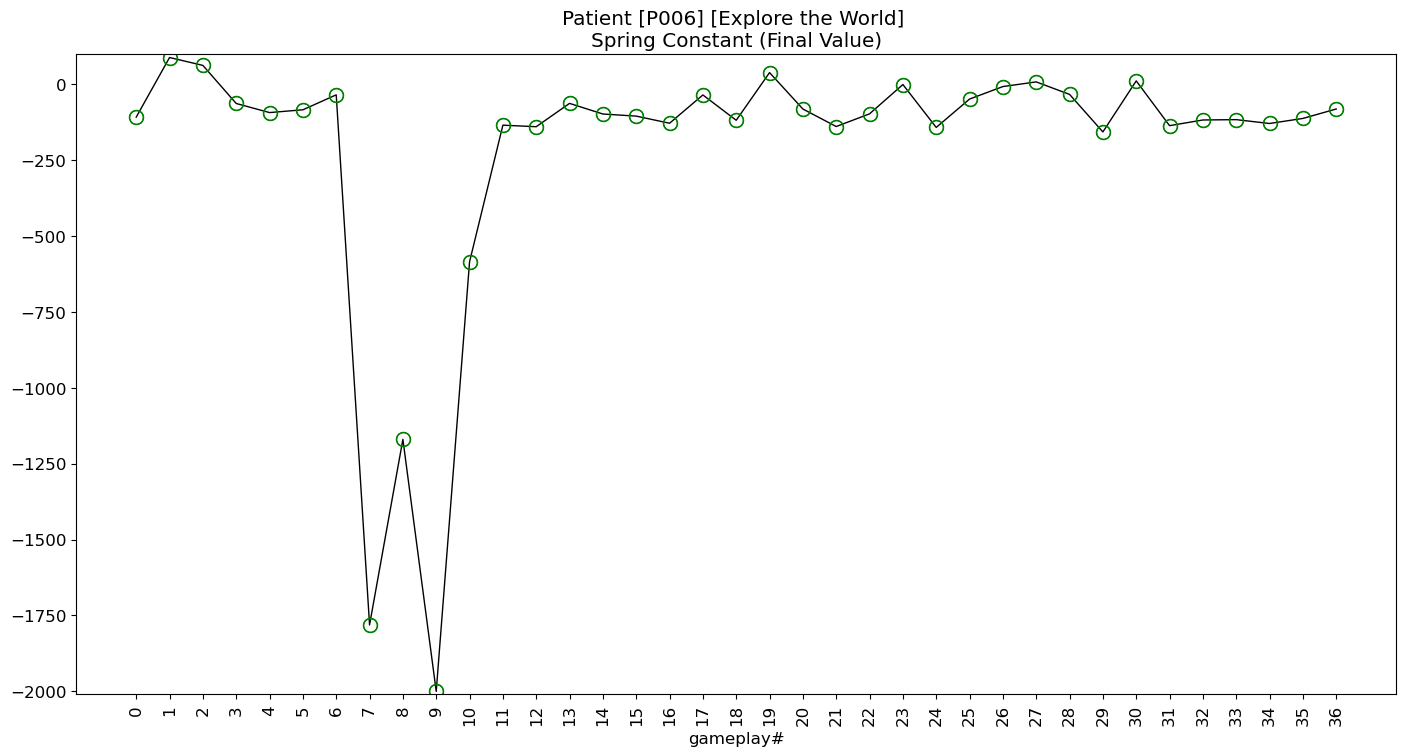

In [34]:
import numpy as np
import matplotlib.pyplot as plt


# set the figure properties
plt.style.use('default')
plt.figure(figsize=(15,8))
plt.rcParams.update({'font.size': 12})
plt.subplots_adjust(left=0.07, bottom=0.1, right=0.95, top=0.9)


title_str = f'Patient [{pat_idstr}] [{game_id_str}] \nSpring Constant (Final Value)'

wid_max = 8
wid_min = 1
D_wid   = wid_max - wid_min  

col_max = 0.9
col_min = 0.2
D_col   = col_max - col_min

# Plot the data points as a line connecting circles
plt.plot(last_five_means, 'o-', linewidth=1, markersize=10, color='black', markerfacecolor='none', markeredgecolor='green')

# Set x-axis label and tick marks
plt.xlabel('gameplay#')
plt.xticks(range(len(last_five_means)), rotation=90)


# Set y-axis label and limits
#plt.ylabel('Stiffness Mean of last five values')
plt.ylim(min(last_five_means)-10, max(last_five_means)+10)

# Plot the data points as a line connecting circles
for i, mean in enumerate(last_five_means):
    if mean == 0:
        plt.plot(i, mean, 'o', markersize=10,  markerfacecolor='none',color='green')
    else:
        plt.plot(i, mean, 'o', markersize=10,  markerfacecolor='none',color='green')

# Set plot title
plt.title(title_str)
plt.savefig('D:\Articares\Patients Gameplay Data\P006_stiffness_final_value.png')
# Display the plot
plt.show()


In [35]:
import numpy as np
import scipy.stats

K_f = []
kf_median = []
kf_MAD = []
std_devs = []
means1=[]  
for sublist in k_x_mean:
    x_0 = np.hstack(np.array_split(sublist, 20)[:3])  # First 15 percent values
    x_last = np.hstack(np.array_split(sublist, 20)[-4:])  # Last 15 percent values
    #x_0 = np.hstack(np.array_split(sublist,20)[1:3])
    #x_last = np.hstack(np.array_split(sublist,20)[16:18])
    median_0 = np.median(x_0)
    MAD_0 = scipy.stats.median_abs_deviation(x_0)
    median_last = np.median(x_last)
    MAD_last = scipy.stats.median_abs_deviation(x_last)
    std_dev = np.std(sublist)
    means = np.mean(sublist)
    std_devs.append(std_dev)
    means1.append(means)
    median_diff = median_last - median_0
    MAD_diff = MAD_last - MAD_0
    
    kf_median.append(median_diff)
    kf_MAD.append(MAD_diff)
    
    z = np.polyfit(range(len(sublist)), sublist, 20)
    p = np.poly1d(z)
    sublist_fit = np.polyval(z, range(len(sublist)))
    
    K_f.append(sublist_fit[-1])


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: RankWarning: Polyfit may be poorly condition

In [36]:
import numpy as np
import scipy.stats

K_f = []
kf_median = []
kf_MAD = []
std_devs = []
means1 = []  
for sublist in k_x_mean:
    if len(sublist) > 0:
        x_0 = np.hstack(np.array_split(sublist, 20)[:3])  # First 15 percent values
        x_last = np.hstack(np.array_split(sublist, 20)[-4:])  # Last 15 percent values
        # x_0 = np.hstack(np.array_split(sublist,20)[1:3])
        # x_last = np.hstack(np.array_split(sublist,20)[16:18])
        median_0 = np.median(x_0)
        MAD_0 = scipy.stats.median_abs_deviation(x_0)
        median_last = np.median(x_last)
        MAD_last = scipy.stats.median_abs_deviation(x_last)
        std_dev = np.std(sublist)
        means = np.mean(sublist)
        std_devs.append(std_dev)
        means1.append(means)
        median_diff = median_last - median_0
        MAD_diff = MAD_last - MAD_0

        kf_median.append(median_diff)
        kf_MAD.append(MAD_diff)

        #z = np.polyfit(range(len(sublist)), sublist, 3)
        #p = np.poly1d(z)
        #sublist_fit = np.polyval(z, range(len(sublist)))

        K_f.append(sublist[-1])


In [37]:
player_nr = []
initial_K_f = []
change_K_f = []


K_f_diff = last_five_means[-1] - last_five_means[0 ] # Assuming sublist is a list of K_f values
#layer_nr.append(nr + 1)  # Make sure to define 'nr' before this loop
initial_K_f.append(last_five_means[0])
change_K_f.append(K_f_diff)
initial_K_f
change_K_f
K_f_diff

26.71148834228515

In [38]:
negative_values = [value for value in last_five_means if value < 0]
pct_Kf_neg = (len(negative_values) / len(last_five_means)) * 100
mean_Kf = sum(last_five_means) / len(last_five_means)
print(pct_Kf_neg)
print(mean_Kf)


86.48648648648648
-215.60357930466935


No handles with labels found to put in legend.


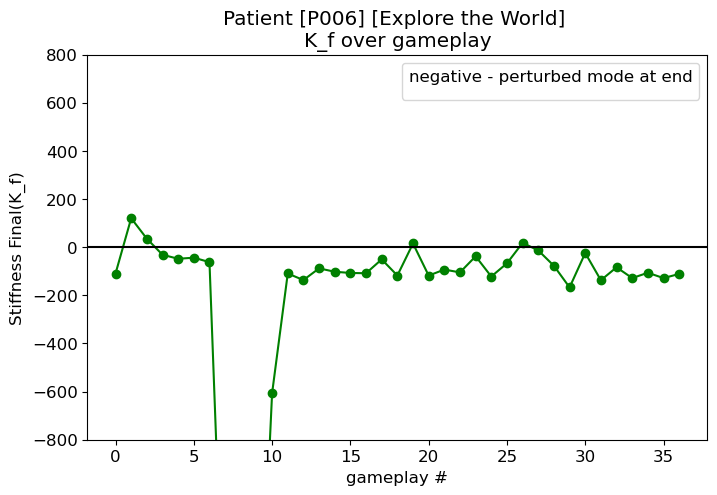

In [39]:
# plot final stiffness value final K_f over gameplays
plt.figure(figsize=(8,5))
title_str = f'Patient [{pat_idstr}] [{game_id_str}] \nK_f over gameplay'
plt.plot(pd.DataFrame(K_f),color='green', marker='o')
plt.axhline(y=0, color='black',linestyle='-')
plt.xlabel('gameplay #')
plt.ylabel('Stiffness Final(K_f)')
plt.ylim([-800,800])
plt.title('K_f over gameplay',fontsize=12)
plt.legend(title='negative - perturbed mode at end')
plt.title(f"{title_str}")
plt.savefig('D:\\Articares\\Patients Gameplay Data\\006_Kx.png',bbox_inches = "tight")
plt.show();

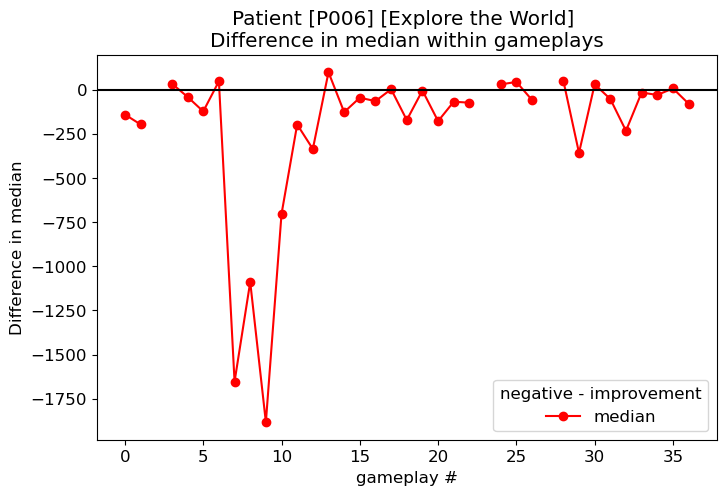

In [40]:
plt.figure(figsize=(8,5))
title_str = f'Patient [{pat_idstr}] [{game_id_str}] \nDifference in median within gameplays'
plt.plot(pd.DataFrame(kf_median),color='red',marker='o',label='median')
plt.axhline(y=0, color='black',linestyle='-')
plt.xlabel('gameplay #')
plt.ylabel('Difference in median')
plt.title(f"{title_str}")
plt.legend(title='negative - improvement')

plt.savefig('D:\\Articares\\Patients Gameplay Data\\006_Kx_median.png',bbox_inches = "tight")
plt.show();

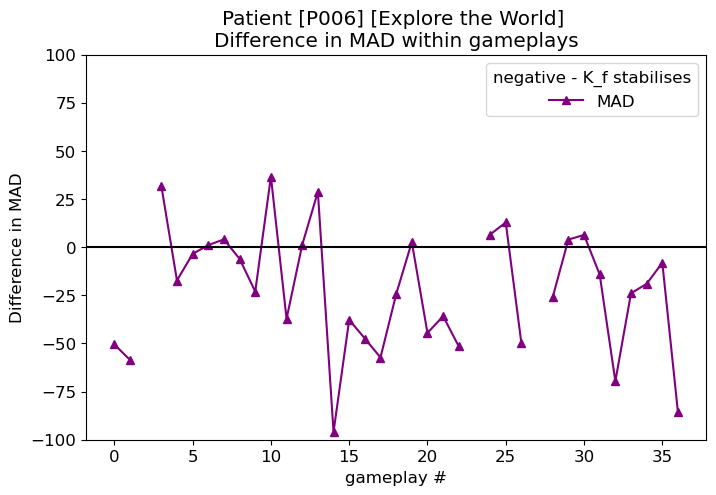

In [41]:
plt.figure(figsize=(8,5))
title_str = f'Patient [{pat_idstr}] [{game_id_str}] \nDifference in MAD within gameplays'
plt.plot(pd.DataFrame(kf_MAD),color='purple',marker='^',label='MAD')
plt.axhline(y=0, color='black',linestyle='-')
plt.xlabel('gameplay #')
plt.ylabel('Difference in MAD')
plt.ylim([-100,100])
#plt.title('Difference in MAD within gameplays',fontsize=12)
plt.legend(title='negative - K_f stabilises')
plt.title(f"{title_str}")
plt.savefig('D:\\Articares\\Patients Gameplay Data\\006_Kx_MAD.png',bbox_inches = "tight")
plt.show();

In [42]:
kf_MAD[1:5]

[-58.54822540283203, nan, 31.936379432678223, -17.292285919189453]

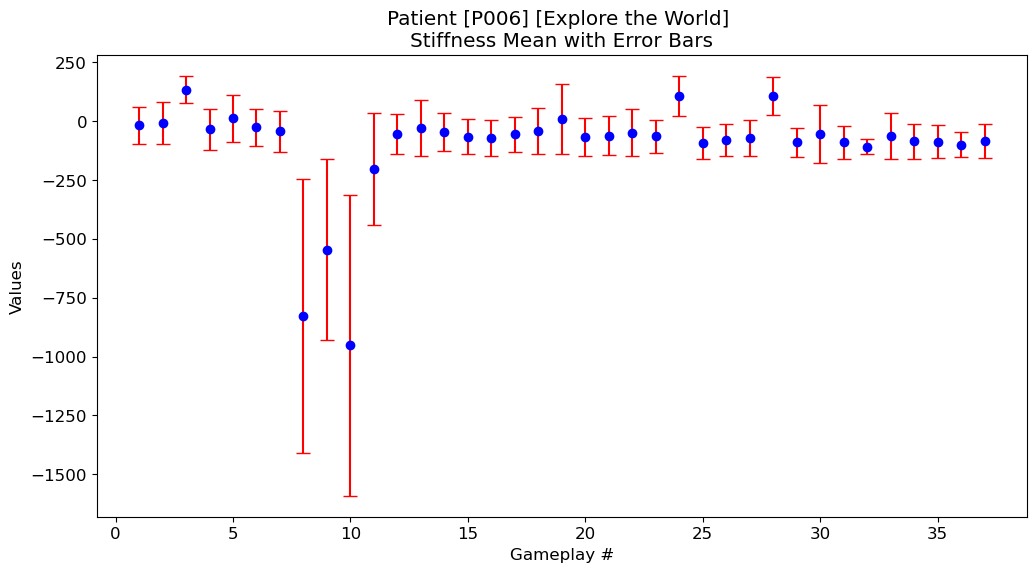

In [43]:
import matplotlib.pyplot as plt
import numpy as np
title_str = f'Patient [{pat_idstr}] [{game_id_str}] \nStiffness Mean with Error Bars'
# Generate x-axis values
x = range(1, len(std_devs) + 1)
# Assuming you have the data stored in the variable 'sublists' as a list of sublists
plt.figure(figsize=(12, 6))

plt.errorbar(x, means1, yerr=std_devs, fmt='o', color='blue', ecolor='red', capsize=5)
plt.xlabel('Gameplay #')
plt.ylabel('Values')
plt.title(f"{title_str}")
plt.savefig('D:\\Articares\\Patients Gameplay Data\\006_Kx_mean.png',bbox_inches = "tight")

plt.show()


In [44]:
last_five_means[1:5]

[86.81267404556274, 60.82441711425781, -64.55173759460449, -94.4620964050293]

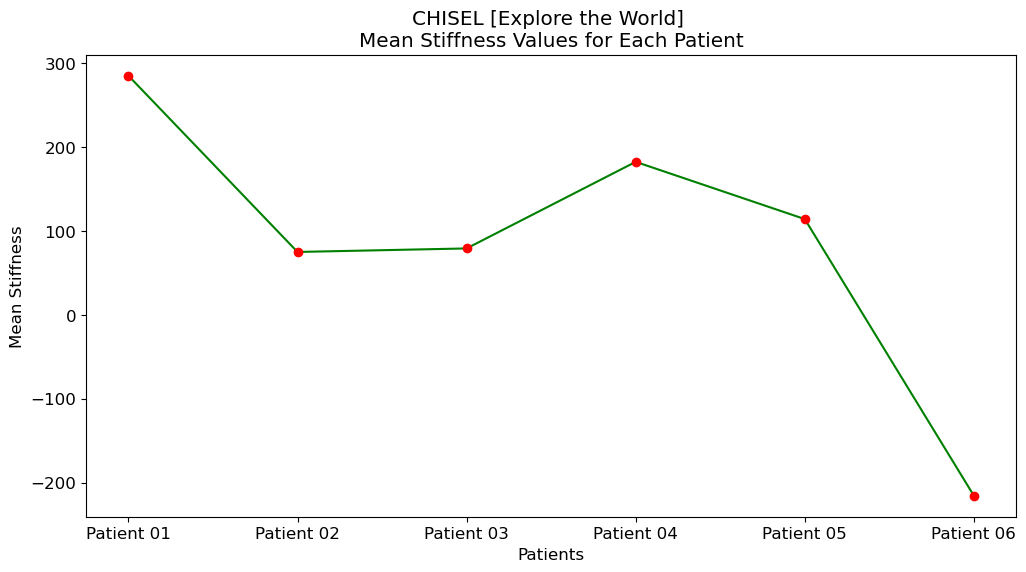

In [45]:
import matplotlib.pyplot as plt

title_str = f'CHISEL [{game_id_str}] \nMean Stiffness Values for Each Patient'
mean_values = [285.15, 75.03, 79.23, 182.48, 114.21, -215.60]
patients = ['Patient 01', 'Patient 02', 'Patient 03', 'Patient 04', 'Patient 05', 'Patient 06']

# Generate x-axis values
plt.figure(figsize=(12, 6))
plt.plot(patients, mean_values, marker='o', linestyle='-', color='green', markerfacecolor='red', markeredgecolor='red')
plt.xlabel('Patients')
plt.ylabel('Mean Stiffness')
plt.title(f"{title_str}")

# Remove grid
plt.grid(False)

# Set background color
plt.gca().set_facecolor('white')

# Save the plot without extra whitespace
plt.savefig('D:\\Articares\\Patients Gameplay Data\\all_chisel_pat_mean.png', bbox_inches='tight', dpi=300)

plt.show()
